In [1]:
# Never mess with this preamble.  
import sys
# comment out this line in your own work by just including a '#' at the beginning 
sys.path.insert(1, '..\\Software\\Library_Files')
# use this line in your own files.  Just delete the '#' at the beginning
# sys.path.insert(1, '.\\Software\\Library_Files')
import PhasePlotter as PP
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Population Models (see 1.2, 2.1, and 2.5)

So, while we used the model 

$$
\frac{dP}{dt} = rP, ~ P(0) = P_{0}, ~ P_{0} \gt 0
$$

to model investments, we could just as well have used it as a model for population growth.  In fact, this was most famously done by Malthus in 1798 (or infamously since Malthus tried to tie human population growth to an increase in poverty, which as an argument enters some interesting ethical spaces to put it mildly), where by assuming $r\gt 0$, he argued using the solution $P(t)=P_{0}e^{rt}$ that human populations would grow exponentially fast.  Now clearly, this is not a terribly sophisticated model, and we can already think of some simple tweaks.  

For example, if we go back to the model 

$$
\frac{dP}{dt} = rP-k, ~ P(0) = P_{0}
$$

where we take $r\gt 0$ and $k\gt 0$, then we see this is a model for an exponentially growing population in which a fixed number of members of the population are removed at every time interval.  Good model maybe for fish in lake with a fixed catch rate.  Dunno, I don't fish.  

Probably the first population model that really starts to feel broadly applicable is the following, known as the *Logistic Model*

$$
\frac{dP}{dt} = rP(K - P), ~ P(0) = P_{0}, ~ r, K \gt 0
$$

**Problem**: 

* Find the solution to the Logistic Model.  Note, you will need to use  
$$
\int \frac{dP}{P(K-P)} = \frac{1}{K}\int \left(\frac{1}{P} + \frac{1}{K-P} \right) dP = \frac{1}{K}\left(\ln|P| - \ln|K-P| \right) = rt + C
$$
* Once you have done that, find 
$$
\lim_{t\rightarrow \infty} P(t) = ?
$$
* Is your infinite time limit independent of the intial conditions?  
* How would you interpret $K$?

*Solution*: 

So using our separation trick, we find that 

$$
\frac{1}{K}\int \left(\frac{1}{P} + \frac{1}{K-P} \right) dP = rt + C
$$

so that we have 

$$
\ln|P| - \ln|K-P| = Krt + C
$$

so that 

$$
\ln\left|\frac{P}{K-P}\right| = Krt + C
$$

or 

$$
\frac{P}{K-P} = \tilde{C}e^{Krt}
$$

Solving for $P$, we find that 

$$
P(t) = \frac{K\tilde{C}e^{Krt}}{1 + \tilde{C}e^{Krt}}
$$

To make this a little prettier, I suggest using 

$$
P(t) = \frac{K}{\frac{1}{\tilde{C}}e^{-Krt} + 1}
$$


As for the initial condition, we have 

$$
P(0) = \frac{K}{\frac{1}{\tilde{C}} + 1} = P_{0}
$$

Solving for $1/\tilde{C}$, we find 

$$
\frac{1}{\tilde{C}} = \frac{K-P_{0}}{P_{0}}.
$$

Finally then, we see that 

$$
P(t) = \frac{K}{\frac{(K-P_{0})}{P_{0}}e^{-Krt} + 1}
$$

Now then, we readily see that 

$$
\lim_{t\rightarrow \infty} P(t) = K,
$$

and that this limit is independent of any initial population.  It is for this reason, that we describe the value $K$ as the *carrying capacity* of the population.  

So huh, okay, we see that no matter what initial population we start with, we should end up with the same population $K$.  What does that look like?  Well, for the sake of argument, let's suppose $K=1$, $r=1$, and let's try $P_{0} = .1, .5, 2, 4$ and then plot the results using our solution.  

Text(0, 0.5, '$P(t)$')

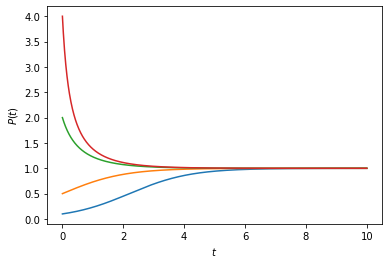

In [2]:
K = 1.
r = 1.

pt = lambda t, p0 :  K/( 1. + (K-p0)/p0 * np.exp(-K*r*t) )

tvals = np.linspace(0.,10.,1000)

plt.plot(tvals,pt(tvals,.1))
plt.plot(tvals,pt(tvals,.5))
plt.plot(tvals,pt(tvals,2.))
plt.plot(tvals,pt(tvals,4.))
plt.xlabel("$t$")
plt.ylabel("$P(t)$")

Okay, so now we see a little more clearly what is going on here.  Those populations that start below $K=10$ rise up to it, while those populations which start above drop down.  Either way though, we see that $K$ has a special power in that it seems to pull other solutions towards it.  Now what is especially cool is that $P(t)=K$ is itself a solution of the differential equation.  

We can see this by noting that for 

$$
\frac{dP}{dt} = rP(K-P)
$$

if $P(t) = K$ then $d/dt K = 0$ and $rK(K-K) = 0$, so $P(t) = K$ solves the equation.  Since $K$ is a constant solution, we call it an *equilibrium solution*, and we see that all other solutions are pulled towards it.  To find all the equilibrium solutions of the above equation, we set $dP/dt=0$ and solve

$$
rP(K-P) = 0
$$

which shows us that we have two equilibrium solutions $P^{eq}_{1} = 0$ and $P^{eq}_{2}= K$.  So if we look at the above figure, we also see that solutions go away from $P^{eq}_{1}= 0$.  So we see one equilibrium is *attractive* or *stable* while the other is *repellant* or *unstable*.  

So we see then that all of our solutions seem to be lining up around the two equilibria.  Is there a way that we can see this all at once?  The answer is yes, and the plot we want is called a *phase plot*.  Let me make it for this problem, and then we'll explain it.  

In [3]:
a = -1.
b = 2.
r = 1.
K = 1.
fun = lambda P: r*P*(K - P)
myplotter = PP.PhasePlotter(a, b, fun, 'P', 'Logistic_Equation')

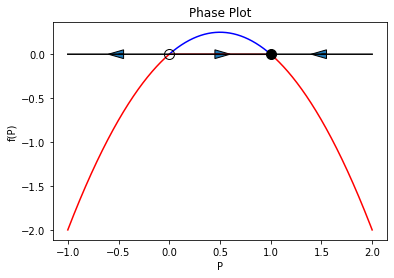

In [4]:
myplotter.PhaseField1D()

So we see $rP(K-P)$ plotted above the $P$ axis.  Where it is positive/blue, we have $dP/dt \gt 0$, and thus we have an arrow pointing to the right.  Where it is negative/red, we have $dP/dt \lt 0$, and we have an arrow pointing to the left.  Thus we see now that solutions want to move away from $P^{eq}_{1}=0$ while solutions are drawn towards $P^{eq}_{2}=K$.  

## Equilibria and Stability for First-Order Autonomous Differential Equations (see 1.2 and 2.5)

So if we try to generalize what we saw above, we would want to study the class of differential equations 

$$
\frac{dy}{dt} = f(y)
$$

We call this a *first-order*, *autonomous* differential equation.  It is first order since the highest derivative in the equation is only a first derivative.  It is called autonomous because $f(y)$ does not depend explicitly on the independent variable $t$.  In contrast, a differential equation of the form

$$
\frac{dy}{dt} = f(t,y)
$$

is a first-order, *nonautonomous* equation since $f(t,y)$ depends explicitly on the independent variable $t$ as well as the dependent variable $y(t)$.  Note, if we had a differential equation of the form 

$$
\frac{d^{2}y}{dt^{2}} = f(t,y) + 3\frac{dy}{dt}
$$

then we call this a *second-order* nonautonomous equation.  Anyway, back to the story.  

So for a general first-order autonomous equation, we have seen from above that much can be learned by studying the equilibrium solutions i.e. 

> Equilibrium Solution: $f(y_{eq}) = 0$, where $dy_{eq}/dt = 0$. 

Now, let's look at what happens near an equilibrium solution.  So for a general solution $y(t)$ near an equilibrium solution $y_{eq}$ we have that

\begin{align*}
\frac{dy}{dt} = & f(y) \\ 
= & f(y_{eq} + y-y_{eq})\\
= & f(y_{eq}) + f'(y_{eq})(y-y_{eq}) + \mathscr{O}\left((y-y_{eq})^{2} \right)\\
= & f'(y_{eq})(y-y_{eq}) + \mathscr{O}\left((y-y_{eq})^{2} \right)
\end{align*} 

Moreover, since $\frac{dy_{eq}}{dt} = 0$, we also see that $\frac{dy}{dt} = \frac{d(y-y_{eq})}{dt}$, and thus we have the approximation

$$
\frac{d}{dt}\left(y - y_{eq} \right) \approx f'(y_{eq})(y-y_{eq})
$$

and thus we have 

$$
y(t) - y_{eq} \approx Ce^{f'(y_{eq})t}.
$$

So now we see that if 

* $f'(y_{eq}) \lt 0 \rightarrow \lim_{t\rightarrow \infty}y(t) = y_{eq}$.  Thus we say $y_{eq}$ is attractive/asymptotically stable.
* $f'(y_{eq}) \gt 0 \rightarrow \lim_{t\rightarrow \infty}y(t) \neq y_{eq}$.  Thus we say $y_{eq}$ is repellent/unstable.
* $f'(y_{eq}) = 0$...  Not clear, you need more information to make a decision.  

Going back to the Logistic Model, in which $f(y) = ry(K - y)$, we have the equilibria $y_{eq} = 0, K$.  We see that 

$$
\frac{df}{dy} = r(K-y) - ry = rK - 2ry
$$

So $f'(0) = rK \gt 0$ and $f'(K)=-rK \lt 0$.  Thus we see we get what we expect with regards to the instability and stability of each equilibrium point respectively.  

**Problem**: For the first-order autonomous equation 

$$
\frac{dy}{dt} = \sin(y)
$$

find and classify the stability of all the equilibrium points.  Sketch the phase plane and provide a rough sketch of how the solution $y(t)$ would behave for different initial conditions in the $(t,y)$ plane.  Note $\cos(n\pi) = (-1)^{n}$, and yes there are an infinite number of equilibrium points.    

In [8]:
a = -.1
b = 6.*np.pi
fun = lambda y: np.sin(y)
newplotter = PP.PhasePlotter(a, b, fun, 'y', 'Sin_Function')

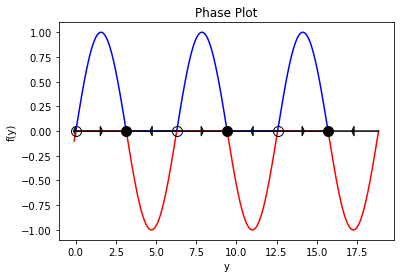

In [9]:
newplotter.PhaseField1D()

**Problem**: For the first-order autonomous equation 

$$
\frac{dy}{dt} = y^{2}
$$

find and classify the stability of all the equilibrium points.  What happens when we try to solve this problem exactly?  What do we see about solutions?  

## 1.3 - Classification of Differential Equations

Getting more general than above, we have that 

> The order of a differential equation is the value of its highest derivative.  

> A general $n^{th}$ order autonomous equation is of the form $F\left(y(t),\frac{dy}{dt},\cdots,\frac{d^{n}y}{dt^{n}}\right) = 0$

> A general $n^{th}$ order non-autonomous equation is of the form $F\left(t, y(t),\frac{dy}{dt},\cdots,\frac{d^{n}y}{dt^{n}}\right) = 0$

> A linear $n^{th}$ order (non-autonomous) equation can be written in the form $\mathcal{L}y = g(t)$ where $$\mathcal{L}y = \sum_{j=0}^{n}a_{j}(t)\frac{d^{j}y}{dt^{j}} $$  If $g(t)=0$ we say the equation is homogeneous.  If an equation is not linear, then it is nonlinear. 

> 1st order, autonomous, linear, homogeneous
$$
\frac{dp}{dt} = rp ~~ \text{or} ~~ \frac{dp}{dt} - rp = 0
$$

> 1st order, autonomous, linear, nonhomogeneous
$$
\frac{dp}{dt} = rp + k ~~ \text{or} ~~ \frac{dp}{dt} - rp = k
$$

> 1st order, autonomous, nonlinear
$$
\frac{dp}{dt} = rp(K-p) ~~ \text{or} ~~ \frac{dp}{dt} - rKp = -rp^{2}
$$

> 1st order, autonomous, nonlinear
$$
\frac{dp}{dt} = \sin(p)
$$

> 1st order, nonautonomous, nonlinear
$$
\frac{dp}{dt} = t\sin(p)
$$

> 2nd order, autonomous, nonlinear
$$
\frac{d^{2}r}{dt^{2}} = - \frac{G}{r^{2}}
$$

**Problem**: Suppose we have a linear, $n^{th}$ order, homogenous problem with two solutions $y_{1}(x)$ and $y_{2}(x)$, which means 

$$
\mathcal{L}y_{j} = 0, ~ \mathcal{L}y_{j} = \sum_{l=0}^{n}a_{l}(x) \frac{d^{l}y_{j}}{dx^{l}}, ~ j=1, 2.
$$

Show that any linear combination of $y_{1}$ and $y_{2}$ gives us another homogenous solution, i.e. show for any constants $c_{1}$ and $c_{2}$ that 

$$
\mathcal{L}(c_{1}y_{1} + c_{2}y_{2}) = c_{1}\mathcal{L}y_{1} + c_{2}\mathcal{L}y_{2} = 0.
$$

**Problem**: Suppose I have the following inhomogenous linear, initial-value problem 

$$
\mathcal{L}y = g(x), ~ \mathcal{L}y = \sum_{l=0}^{n}a_{l}(x) \frac{d^{l}y}{dx^{l}}, ~ y(0) = y_{0}.
$$

Show that the solution to the above problem can be written in the form 

$$
y(x) = y_{h}(x) + y_{p}(x)
$$

where 

$$
\mathcal{L}y_{h} = 0, ~ y_{h}(0) = y_{0}
$$

and

$$
\mathcal{L}y_{p} = g(x), ~ y_{p}(0) = 0.
$$